In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
X=data.drop("Outcome",axis=1)
y=data["Outcome"]
print(type(y),type(X))

<class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>


Gaussian Naive Bayes model accuracy(in %): 78.35497835497836
[[128  18]
 [ 32  53]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       146
           1       0.75      0.62      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



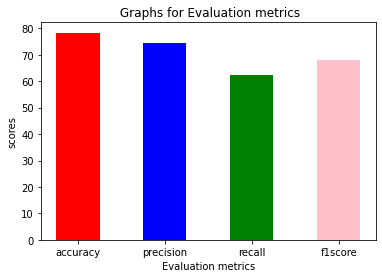

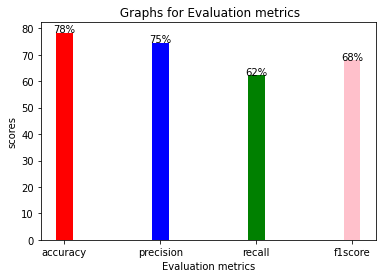

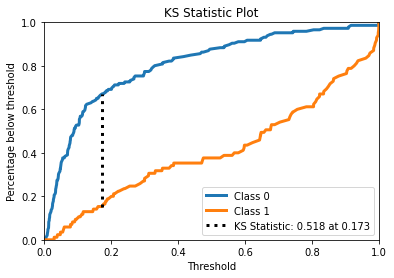

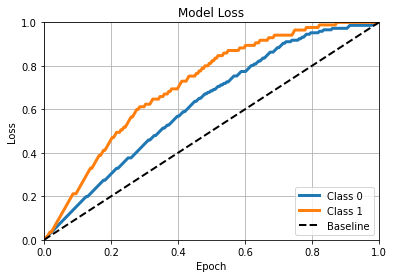

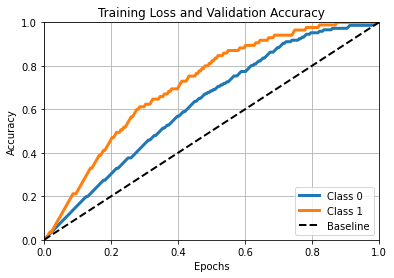

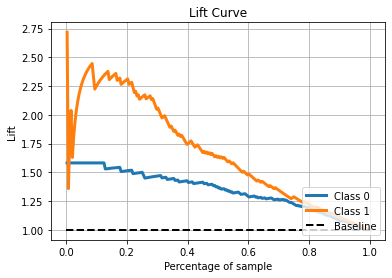

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
 
#Naive bayes

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
 
y_pred = model.predict(X_test)

from sklearn import metrics
g=metrics.accuracy_score(y_test, y_pred)*100
cm=metrics.confusion_matrix(y_test, y_pred)
print("Gaussian Naive Bayes model accuracy(in %):", g)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

#calculating evaluation metrics individually

accuracy = metrics.accuracy_score(y_test, y_pred)*100
precision_positive = metrics.precision_score(y_test, y_pred, pos_label=1)*100
recall_sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)*100
f1_positive = metrics.f1_score(y_test, y_pred, pos_label=1)*100

#plotting graph for evaluation metrics
a=[accuracy,precision_positive,recall_sensitivity,f1_positive]
b=['accuracy','precision','recall','f1score']
c=[2,4,6,8]


plt.bar(c,a,tick_label=b,color=['red','blue','green','pink'],width=1)
plt.xlabel("Evaluation metrics")
plt.ylabel("scores")
plt.title(" Graphs for Evaluation metrics")


width = 0.35
fig, ax = plt.subplots()
per=ax.bar(c,a,tick_label=b,color=['red','blue','green','pink'],width=0.35,align='center')
for p in per:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{0:0.0f}%".format(height),
      ha='center')
plt.xlabel("Evaluation metrics")
plt.ylabel("scores")
plt.title(" Graphs for Evaluation metrics")
plt.show()


import scikitplot as skplt 
target_proba =model.predict_proba(X_test)
skplt.metrics.plot_ks_statistic(y_test, target_proba)
plt.show()


skplt.metrics.plot_cumulative_gain(y_test, target_proba)
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


skplt.metrics.plot_cumulative_gain(y_test, target_proba)
plt.title("Training Loss and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

skplt.metrics.plot_lift_curve(y_test, target_proba)
plt.show()

model accuracy(in %): 69.6969696969697
[[116  30]
 [ 40  45]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.77       146
           1       0.60      0.53      0.56        85

    accuracy                           0.70       231
   macro avg       0.67      0.66      0.67       231
weighted avg       0.69      0.70      0.69       231



Text(0.5, 1.0, ' Graphs for Evaluation metrics')

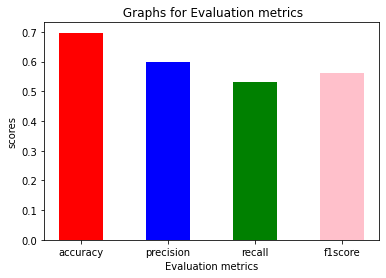

In [6]:
#Decision tree

from sklearn.tree import DecisionTreeClassifier
model2= DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
g1= metrics.accuracy_score(y_test, y_pred)*100
cm1=metrics.confusion_matrix(y_test, y_pred)
print("model accuracy(in %):",g1)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

#calculatingevaluation metrics individually

accuracy = metrics.accuracy_score(y_test, y_pred)
precision_positive = metrics.precision_score(y_test, y_pred, pos_label=1)
recall_sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
f1_positive = metrics.f1_score(y_test, y_pred, pos_label=1)

#plotting graph for evaluation metrics
a=[accuracy,precision_positive,recall_sensitivity,f1_positive]
b=['accuracy','precision','recall','f1score']
c=[2,4,6,8]

plt.bar(c,a,tick_label=b,color=['red','blue','green','pink'],width=1)

plt.xlabel("Evaluation metrics")
plt.ylabel("scores")
plt.title(" Graphs for Evaluation metrics")


In [7]:
#svm

from sklearn import svm
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model3 = svm.SVC(kernel=k)
    model3.fit(X_train, y_train)
    y_pred = model3.predict(X_train)
    print(k)
    g2=metrics.accuracy_score(y_train, y_pred)*100
    print(g2)
print(metrics.confusion_matrix(y_train, y_pred))


linear
78.02607076350093
poly
75.79143389199255
rbf
76.16387337057728
sigmoid
52.7001862197393
[[262  92]
 [162  21]]


80.08658008658008
[[133  13]
 [ 33  52]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       146
           1       0.80      0.61      0.69        85

    accuracy                           0.80       231
   macro avg       0.80      0.76      0.77       231
weighted avg       0.80      0.80      0.79       231



Text(0.5, 1.0, ' Graphs for Evaluation metrics')

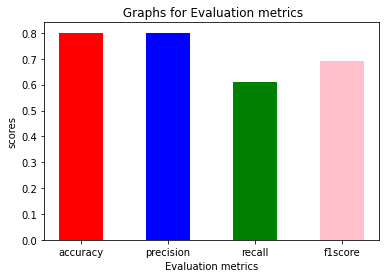

In [8]:
#Random forest

from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred=model4.predict(X_test)
g3=metrics.accuracy_score(y_test, y_pred)*100
cm3=metrics.confusion_matrix(y_test, y_pred)
print(g3)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

#calculatingevaluation metrics individually

accuracy = metrics.accuracy_score(y_test, y_pred)
precision_positive = metrics.precision_score(y_test, y_pred, pos_label=1)
recall_sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
f1_positive = metrics.f1_score(y_test, y_pred, pos_label=1)

#plotting graph for evaluation metrics
a=[accuracy,precision_positive,recall_sensitivity,f1_positive]
b=['accuracy','precision','recall','f1score']
c=[2,4,6,8]

plt.bar(c,a,tick_label=b,color=['red','blue','green','pink'],width=1)
plt.xlabel("Evaluation metrics")
plt.ylabel("scores")
plt.title(" Graphs for Evaluation metrics")

accuracy:- 77.05627705627705
[[128  18]
 [ 35  50]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.74      0.59      0.65        85

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



Text(0.5, 1.0, ' Graphs for Evaluation metrics')

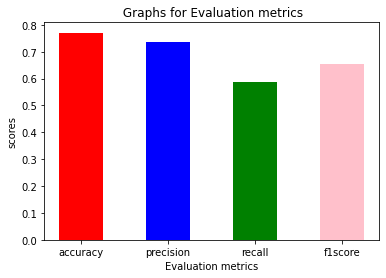

In [9]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier()
model5.fit(X_train, y_train)
y_pred=model5.predict(X_test)
g4=metrics.accuracy_score(y_test, y_pred)*100
cm4=metrics.confusion_matrix(y_test, y_pred)
print("accuracy:-",g4)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

#calculatingevaluation metrics individually

accuracy = metrics.accuracy_score(y_test, y_pred)
precision_positive = metrics.precision_score(y_test, y_pred, pos_label=1)
recall_sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
f1_positive = metrics.f1_score(y_test, y_pred, pos_label=1)

#plotting graph for evaluation metrics
a=[accuracy,precision_positive,recall_sensitivity,f1_positive]
b=['accuracy','precision','recall','f1score']
c=[2,4,6,8]

plt.bar(c,a,tick_label=b,color=['red','blue','green','pink'],width=1)
plt.xlabel("Evaluation metrics")
plt.ylabel("scores")
plt.title(" Graphs for Evaluation metrics")

In [10]:
                              # GRAPHS FOR ALL AGORITMS


In [11]:
a=[g,g1,g3,g4]
cm5=[cm,cm1,cm3,cm4]

b=['NB','DT','RD','KNN']
c=[10,20,30,40]


Text(0.5, 1.0, 'All Algorithms Graphs for Accuracy')

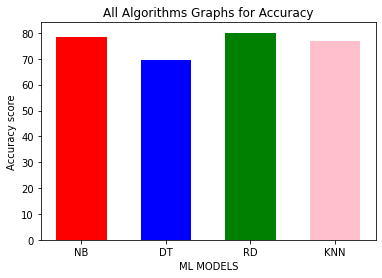

In [12]:
plt.bar(c,a,tick_label=b,color=['red','blue','green','pink'],width=6)
plt.xlabel("ML MODELS")
plt.ylabel("Accuracy score")
plt.title("All Algorithms Graphs for Accuracy")



Text(0.5, 1.0, 'All Algorithms Graphs for Accuracy')

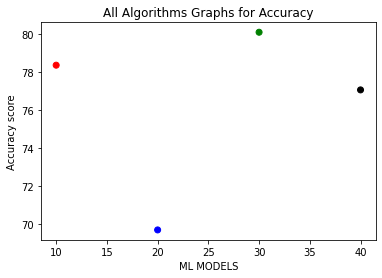

In [13]:
plt.scatter(c,a,color=['red','blue','green','black'])
plt.xlabel("ML MODELS")
plt.ylabel("Accuracy score")
plt.title("All Algorithms Graphs for Accuracy")

Text(0.5, 1.0, 'All Algorithms Graphs for Accuracy')

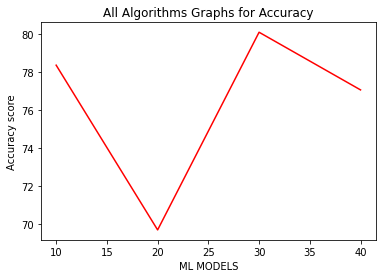

In [14]:
plt.plot(c,a,color='red')
plt.xlabel("ML MODELS")
plt.ylabel("Accuracy score")
plt.title("All Algorithms Graphs for Accuracy")

In [ ]:
pip install pandas

In [ ]:
pip install sklearn

In [ ]:
pip install scikit-plot